In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array(
    [
        [4.7],
        [2.4],
        [7.5],
        [7.1],
        [4.3],
        [7.8],
        [8.9],
        [5.2],
        [4.59],
        [2.1],
        [8],
        [5],
        [7.5],
        [5],
        [4],
        [8],
        [5.2],
        [4.9],
        [3],
        [4.7],
        [4],
        [4.8],
        [3.5],
        [2.1],
        [4.1],
    ],
    dtype=np.float32,
)
c
y_train = np.array(
    [
        [2.6],
        [1.6],
        [3.09],
        [2.4],
        [2.4],
        [3.3],
        [2.6],
        [1.96],
        [3.13],
        [1.76],
        [3.2],
        [2.1],
        [1.6],
        [2.5],
        [2.2],
        [2.75],
        [2.4],
        [1.8],
        [1],
        [2],
        [1.6],
        [2.4],
        [2.6],
        [1.5],
        [3.1],
    ],
    dtype=np.float32,
)

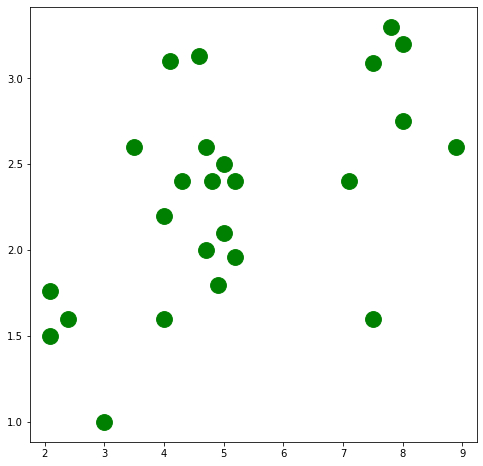

In [3]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c="green", s=250, label="Original Data")

plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print("requires_grad for X_train: ", X_train.requires_grad)
print("requires_grad for Y_train: ", Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [7]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [8]:
b1 = torch.rand(hidden_size, output_size, requires_grad=True)
b1.shape

torch.Size([1, 1])

In [9]:
w1

tensor([[0.9435]], requires_grad=True)

In [10]:
b1

tensor([[0.5973]], requires_grad=True)

In [15]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 100 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 8.24272632598877
200 6.770336151123047
300 6.3191938400268555
400 6.180962085723877
500 6.138607025146484
600 6.125629425048828
700 6.121653079986572
800 6.1204352378845215
900 6.120061874389648
1000 6.119947910308838
1100 6.119912147521973
1200 6.119901657104492
1300 6.119898319244385
1400 6.119897842407227
1500 6.119896411895752
1600 6.119897365570068
1700 6.119897365570068
1800 6.11989688873291
1900 6.119896411895752
2000 6.119897365570068
2100 6.119896411895752
2200 6.119896411895752
2300 6.119896411895752
2400 6.119896411895752
2500 6.119896411895752
2600 6.119896411895752
2700 6.119896411895752
2800 6.119896411895752
2900 6.119896411895752
3000 6.119896411895752
3100 6.119896411895752
3200 6.119896411895752
3300 6.119896411895752
3400 6.119896411895752
3500 6.119896411895752
3600 6.119896411895752
3700 6.119896411895752
3800 6.119896411895752
3900 6.119896411895752
4000 6.119896411895752


In [16]:
print("w1: ", w1)
print("b1: ", b1)

w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


In [17]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [18]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

tensor([[2.2273],
        [1.8247],
        [2.7175],
        [2.6475],
        [2.1573],
        [2.7701],
        [2.9626],
        [2.3149],
        [2.2081],
        [1.7721],
        [2.8051],
        [2.2799],
        [2.7175],
        [2.2799],
        [2.1048],
        [2.8051],
        [2.3149],
        [2.2624],
        [1.9297],
        [2.2273],
        [2.1048],
        [2.2448],
        [2.0172],
        [1.7721],
        [2.1223]], grad_fn=<AddBackward0>)

In [19]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2273371],
       [1.8246689],
       [2.717542 ],
       [2.6475127],
       [2.1573079],
       [2.7700639],
       [2.9626443],
       [2.3148737],
       [2.208079 ],
       [1.7721468],
       [2.8050785],
       [2.279859 ],
       [2.717542 ],
       [2.279859 ],
       [2.104786 ],
       [2.8050785],
       [2.3148737],
       [2.2623518],
       [1.9297128],
       [2.2273371],
       [2.104786 ],
       [2.2448444],
       [2.0172493],
       [1.7721468],
       [2.1222932]], dtype=float32)

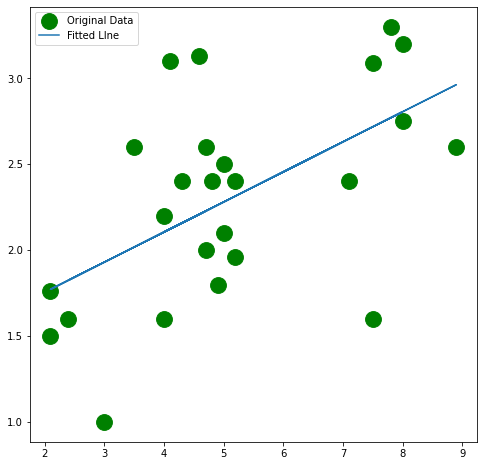

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c="green", s=250, label="Original Data")
plt.plot(x_train, predicted, label="Fitted LIne")
plt.legend()
plt.show()

In [22]:
import sklearn
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression().fit(x_train, y_train)

In [24]:
print("w1 with sklearn is :", reg.coef_)

w1 with sklearn is : [[0.17507163]]


In [25]:
print("b1 with sklearn is: ", reg.intercept_)

b1 with sklearn is:  [1.4045022]


In [28]:
predicted = reg.predict(x_train)
predicted

array([[2.2273388],
       [1.8246741],
       [2.7175393],
       [2.6475105],
       [2.1573102],
       [2.770061 ],
       [2.9626396],
       [2.3148746],
       [2.208081 ],
       [1.7721525],
       [2.8050752],
       [2.2798603],
       [2.7175393],
       [2.2798603],
       [2.1047888],
       [2.8050752],
       [2.3148746],
       [2.2623532],
       [1.9297171],
       [2.2273388],
       [2.1047888],
       [2.2448459],
       [2.017253 ],
       [1.7721525],
       [2.1222959]], dtype=float32)